<a href="https://colab.research.google.com/github/IAMLATI/Demo-Repo2/blob/master/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objects as go

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df= pd.read_csv("/content/loan_data.csv")

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.shape

(45000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

**Brief Description of Each Column:**

Person_age: Contains the Client's age

Person_gender:Contains the Client's gender

Person_education: Contains the Client's education degree

Person_income: Contains the Client's salary range

Person_emp_exp: Client Years of employment experience

Person_home_ownership: Client's home ownership status

Loan_amnt: Loan amount requested

Loan_intent: Purpose of the loan

Loan_int_rate:  Loan interest rate

Loan_percent_income:Loan amount as a percentage of annual income

Cb_person_cred_hist_length: Length of credit history in years

Credit_score:Credit score of the person

Previous_loan_defaults_on_file: Indicator of previous loan defaults

Loan_status: Loan approval status: 1 = approved; 0 = rejected

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.duplicated().sum()

np.int64(0)

This dataset contains zero duplicated  and Null data

In [ ]:

gender_counts = df['person_gender'].str.lower().value_counts()


labels = gender_counts.index.tolist()
values = gender_counts.values.tolist()


custom_colors = {
    'male': '#1f77b4',
    'female': '#ff69b4',
}

colors = [custom_colors.get(label, '#d3d3d3') for label in labels]


pulls = [0.15 if label == 'female' else 0 for label in labels]


fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    hole=0.3,  # donut style
    marker=dict(colors=colors, line=dict(color='black', width=2)),
    textinfo='percent+label',
    pull=pulls
)])


fig.update_layout(
    title_text="💠 Gender Distribution of Clients",
    title_font_size=20,
    legend_title="Gender",
    legend=dict(orientation="h", yanchor="bottom", y=-0.2, xanchor="center", x=0.5),
    paper_bgcolor='white',
    showlegend=True
)

fig.show()


In [ ]:
df["person_education"].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

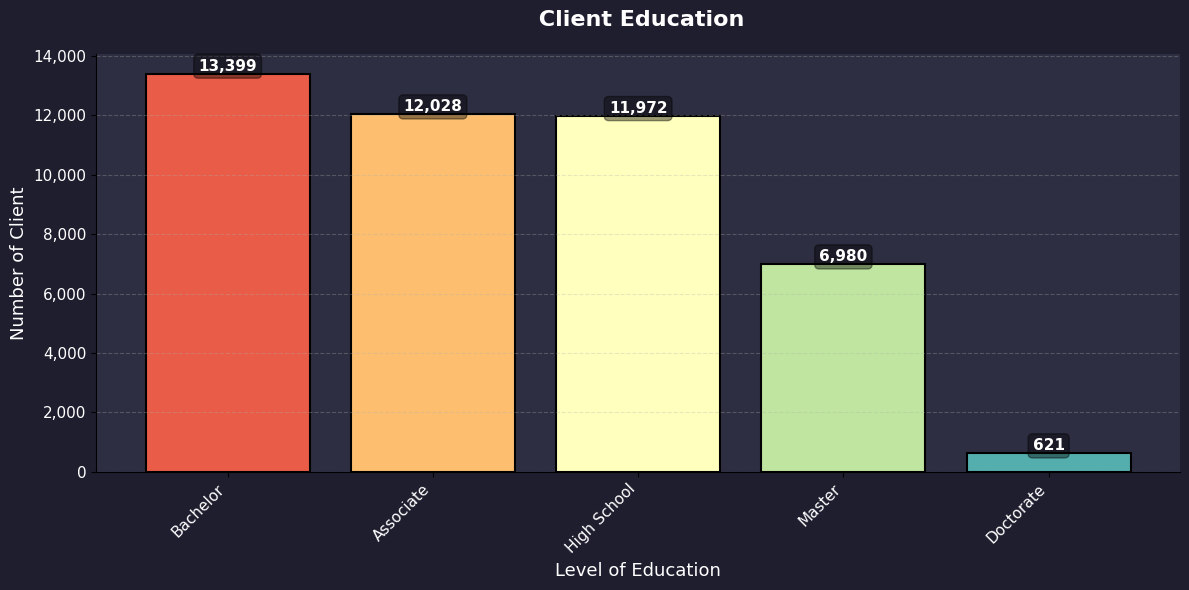

In [ ]:
client_education = df['person_education'].value_counts().head()

colors = sns.color_palette("Spectral", len(client_education))

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#1e1e2f')
ax.set_facecolor('#2e2e42')

bars = ax.bar(client_education.index, client_education.values, color=colors, edgecolor='black', linewidth=1.5)


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:,}',
            ha='center', va='bottom', fontsize=11, fontweight='bold',
            color='white', bbox=dict(facecolor='black', alpha=0.4, boxstyle='round,pad=0.3'))

ax.set_title(' Client Education', fontsize=16, color='white', weight='bold', pad=20)
ax.set_xlabel('Level of Education', fontsize=13, color='white')
ax.set_ylabel('Number of Client', fontsize=13, color='white')

ax.set_xticklabels(client_education.index, rotation=45, ha='right', fontsize=11, color='white')
ax.set_yticklabels([f'{int(y):,}' for y in ax.get_yticks()], fontsize=11, color='white')

ax.grid(axis='y', linestyle='--', alpha=0.3)

sns.despine()

plt.tight_layout()
plt.show()


In [ ]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

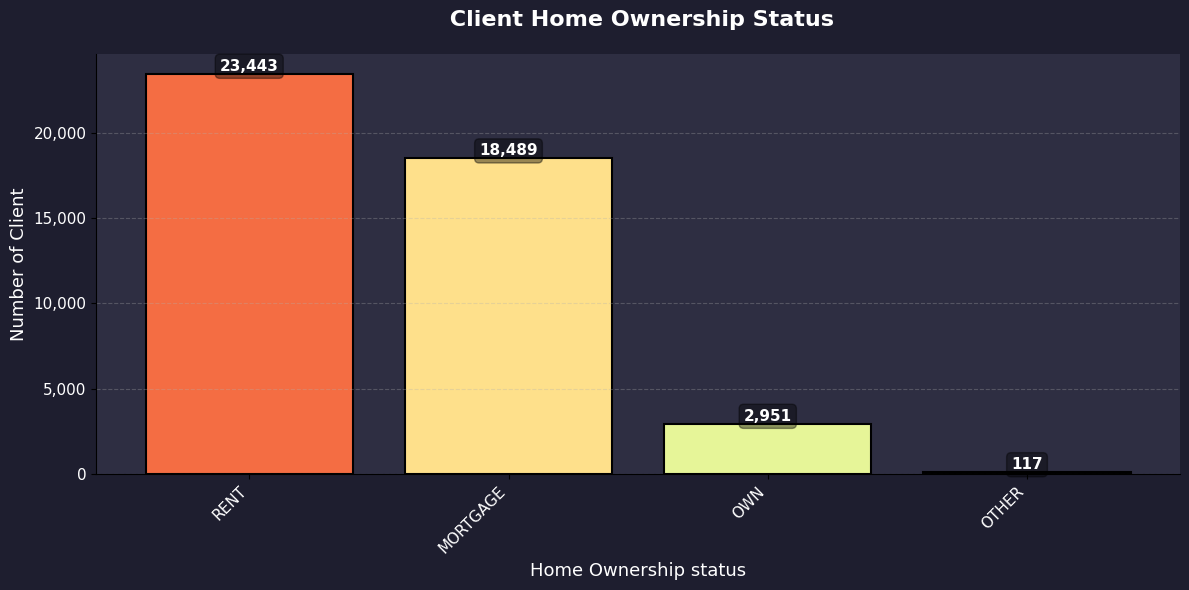

In [ ]:
Client_home_status = df['person_home_ownership'].value_counts().head()

colors = sns.color_palette("Spectral", len(Client_home_status))

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#1e1e2f')
ax.set_facecolor('#2e2e42')

bars = ax.bar(Client_home_status.index, Client_home_status.values, color=colors, edgecolor='black', linewidth=1.5)


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:,}',
            ha='center', va='bottom', fontsize=11, fontweight='bold',
            color='white', bbox=dict(facecolor='black', alpha=0.4, boxstyle='round,pad=0.3'))

ax.set_title(' Client Home Ownership Status', fontsize=16, color='white', weight='bold', pad=20)
ax.set_xlabel('Home Ownership status', fontsize=13, color='white')
ax.set_ylabel('Number of Client', fontsize=13, color='white')

ax.set_xticklabels(Client_home_status.index, rotation=45, ha='right', fontsize=11, color='white')
ax.set_yticklabels([f'{int(y):,}' for y in ax.get_yticks()], fontsize=11, color='white')

ax.grid(axis='y', linestyle='--', alpha=0.3)

sns.despine()

plt.tight_layout()
plt.show()


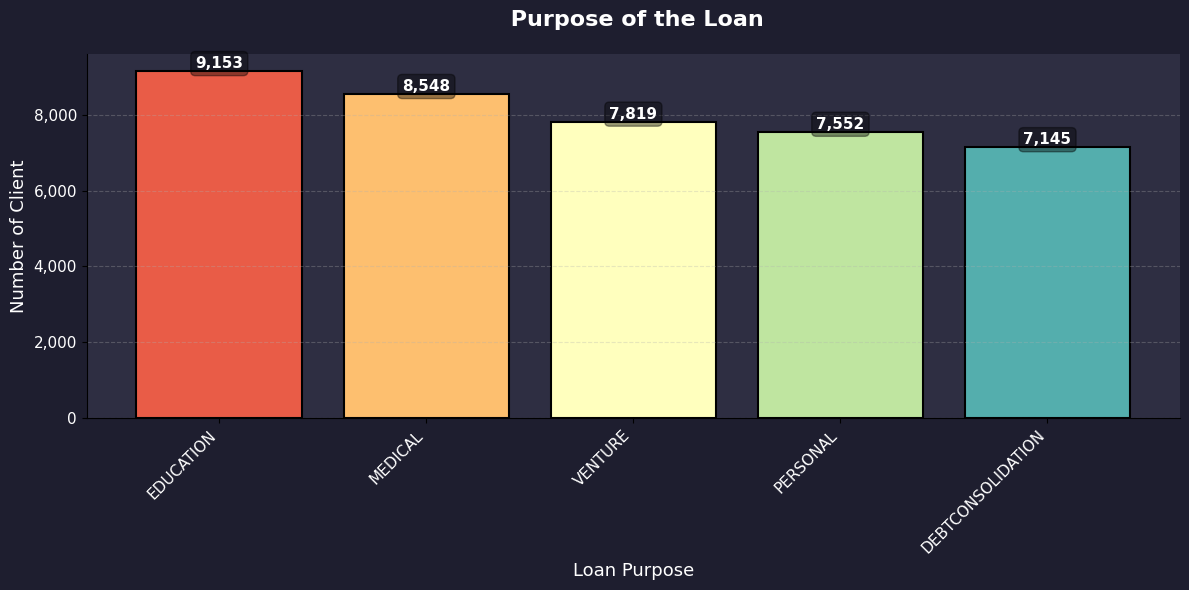

In [ ]:
Purpose_of_the_loan = df['loan_intent'].value_counts().head()

colors = sns.color_palette("Spectral", len(Purpose_of_the_loan))

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#1e1e2f')
ax.set_facecolor('#2e2e42')

bars = ax.bar(Purpose_of_the_loan.index, Purpose_of_the_loan.values, color=colors, edgecolor='black', linewidth=1.5)


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:,}',
            ha='center', va='bottom', fontsize=11, fontweight='bold',
            color='white', bbox=dict(facecolor='black', alpha=0.4, boxstyle='round,pad=0.3'))

ax.set_title(' Purpose of the Loan', fontsize=16, color='white', weight='bold', pad=20)
ax.set_xlabel('Loan Purpose', fontsize=13, color='white')
ax.set_ylabel('Number of Client', fontsize=13, color='white')

ax.set_xticklabels(Purpose_of_the_loan.index, rotation=45, ha='right', fontsize=11, color='white')
ax.set_yticklabels([f'{int(y):,}' for y in ax.get_yticks()], fontsize=11, color='white')

ax.grid(axis='y', linestyle='--', alpha=0.3)

sns.despine()

plt.tight_layout()
plt.show()


In [ ]:
df["person_age"].unique()

array([ 22.,  21.,  25.,  23.,  24.,  26., 144., 123.,  20.,  32.,  34.,
        29.,  33.,  28.,  35.,  31.,  27.,  30.,  36.,  40.,  50.,  45.,
        37.,  39.,  44.,  43.,  41.,  46.,  38.,  47.,  42.,  48.,  49.,
        58.,  65.,  51.,  53.,  66.,  61.,  54.,  57.,  59.,  62.,  60.,
        55.,  52.,  64.,  70.,  78.,  69.,  56.,  73.,  63.,  94.,  80.,
        84.,  76.,  67., 116., 109.])

In [ ]:
bins = [0, 18, 25, 35, 45, 55, 65, 80, 140]
labels = ['<18', '18–25', '26–35', '36–45', '46–55', '56–65', '65-80','81++']

df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=False)


In [ ]:
df['age_group'].value_counts().sort_index()

,count
age_group,
<18,0
18–25,15934
26–35,23733
36–45,4436
46–55,716
56–65,132
65-80,39
81++,7


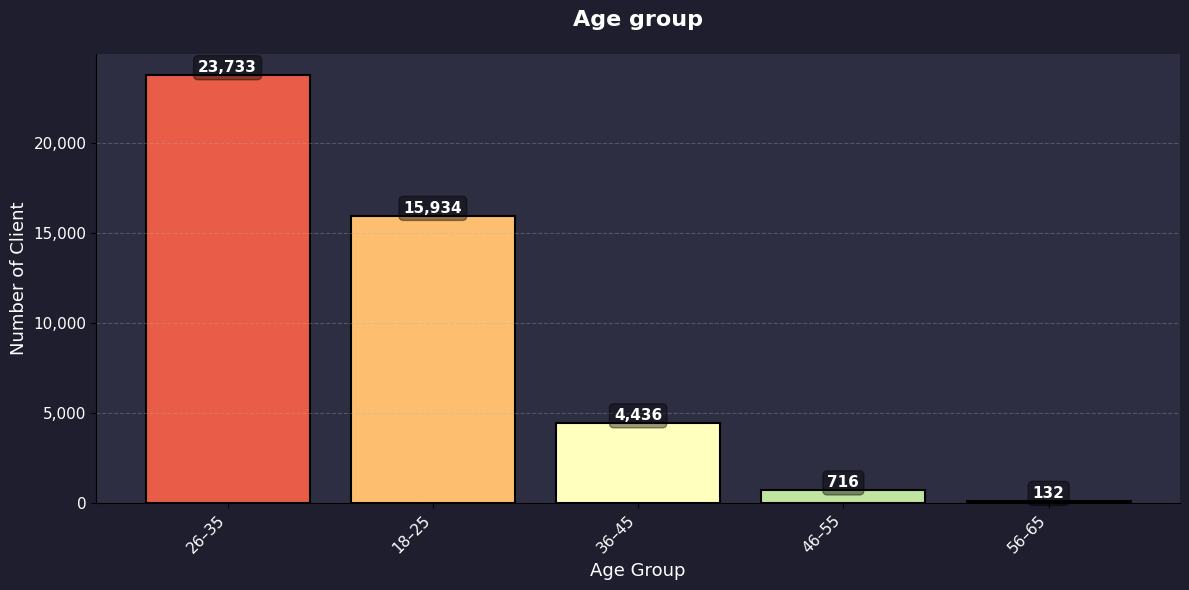

In [ ]:
age_group = df['age_group'].value_counts().head()

colors = sns.color_palette("Spectral", len(age_group))

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#1e1e2f')
ax.set_facecolor('#2e2e42')

bars = ax.bar(age_group.index, age_group.values, color=colors, edgecolor='black', linewidth=1.5)


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:,}',
            ha='center', va='bottom', fontsize=11, fontweight='bold',
            color='white', bbox=dict(facecolor='black', alpha=0.4, boxstyle='round,pad=0.3'))

ax.set_title('Age group', fontsize=16, color='white', weight='bold', pad=20)
ax.set_xlabel('Age Group', fontsize=13, color='white')
ax.set_ylabel('Number of Client', fontsize=13, color='white')

ax.set_xticklabels(age_group.index, rotation=45, ha='right', fontsize=11, color='white')
ax.set_yticklabels([f'{int(y):,}' for y in ax.get_yticks()], fontsize=11, color='white')

ax.grid(axis='y', linestyle='--', alpha=0.3)

sns.despine()

plt.tight_layout()
plt.show()
#Age group
